In [126]:
#HW 2    Devin Fan     918042189
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [148]:
p=np.array([1,10,50,100,200,300,400,600,800])
t=np.array([0,25,50])
z0=np.array([1,.996,0.985,0.984,1.036,1.134,1.256,1.524,1.798])
z25=np.array([1,.998,0.996,1.004,1.057,1.146,1.254,1.495,1.72])
z50=np.array([1,1,1.004,1.018,1.072,1.154,1.253,1.471,1.697])
z=np.zeros((3,9))
z[0,:] = z0
z[1,:] = z25
z[2,:] = z50
def work(p,z,t):
    def trapz(y,x):
        Sum = 0
        for i in range(0,y.shape[0]-1):
            h=x[i+1]-x[i]
            Sum+=h*(y[i+1]+y[i])/2
            return Sum
    work=np.zeros((1,z.shape[0]))
    for i in range(0,z.shape[0]):
        temp=t[i]+273
        n=1
        r=8.314
        v=n*r*temp*np.divide(z[i,:],p)
        work[0,i]=trapz(p,v)
    return work
W=abs(work(p,z,t))
print('Work at 0 degrees C is %.0f J' %W[0,0])
print('Work at 25 degrees C is %.0f J' %W[0,1])
print('Work at 50 degrees C is %.0f J' %W[0,2])

Work at 0 degrees C is 11240 J
Work at 25 degrees C is 12267 J
Work at 50 degrees C is 13293 J


In [109]:
#Problem 2
t=np.arange(100,1501,100)
cp=np.array([40.06,43.48,46.41,48.90,50.99,52.73,54.15,55.32,56.26,57.03,57.67,58.23,58.75,59.27,59.84])
n=1
def simps(x,y):
    h=x[1]-x[0]
    I=(y[0]+y[-1])*h/3
    I+=sum(y[2:-1:2])*2*h/3
    I+=sum(y[1:-1:2])*4*h/3
    return I
def h(x,y,n):
    h=n*simps(t,cp)
    return h
h=h(t,cp,n)
print("The total entropy change is %.0f J" %h)

The total entropy change is 74940 J


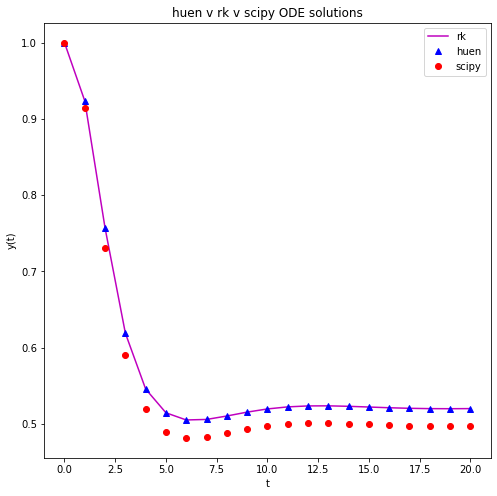

In [192]:
#Problem 3
dydt = lambda y,t: -np.sin(t)/(1+t**3)*np.exp((-y**2)/3)
h = 0.5
t = np.arange(0,10+h,h)
y = np.zeros(t.shape)
y[0] = 1

def huen(f,t,y,h):
    for i in range(len(t)-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i]+h*k1, t[i+1])
        k = (k1+k2)/2
        y[i+1] = y[i] + k*h
    return y
def rk(f,t,y,h):    
    for i in range(len(t)-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i]+h*k1/2, t[i]+h/2)
        k3 = f(y[i]+h*k2/2, t[i]+h/2)
        k4 = f(y[i]+h*k3, t[i+1])
        k = (k1+2*k2+2*k3+k4)/6
        y[i+1] = y[i] + k*h
    return y
rk_plot=rk(dydt,t,y,h)
huen_plot=huen(dydt,t,y,h)
scipy_plot=scipy.integrate.odeint(dydt,1,t)

plt.figure(figsize=(8,8))
plt.plot(rk_plot,'m',label='rk')
plt.plot(huen_plot,'b^',label='huen')
plt.plot(scipy_plot,'ro',label='scipy')
plt.title('huen v rk v scipy ODE solutions')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

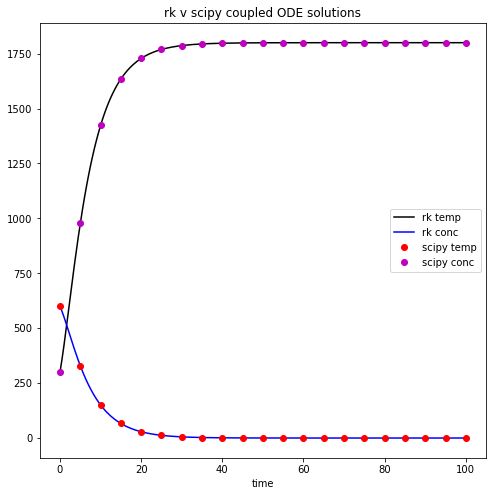

In [269]:
#Problem 4
tr=300
k1=-.2
k2=.5
t = np.arange(0,100.1,0.5)
y0=[600,300]

dcdt = lambda c,T,t: k1*c*np.exp(-tr/T)
dtdt = lambda c,T,t: k2*c*np.exp(-tr/T)

def f(y,t): return [k1*y[0]*np.exp(-tr/y[1]),k2*y[0]*np.exp(-tr/y[1])]

def rkcoup(fx,fy,x1,y1,t,h=0.5):
    x = np.zeros(t.shape)
    y = np.zeros(t.shape)
    x[0] = x1
    y[0] = y1
    for i in range(len(time)-1):
        kx1 = fx(x[i], y[i], t[i])
        ky1 = fy(x[i], y[i], t[i])
        kx2 = fx(x[i]+h*kx1/2, y[i]+h*ky1/2, t[i]+h/2)
        ky2 = fy(x[i]+h*kx1/2, y[i]+h*ky1/2, t[i]+h/2)
        kx3 = fx(x[i]+h*kx2/2, y[i]+h*ky2/2, t[i]+h/2)
        ky3 = fy(x[i]+h*kx2/2, y[i]+h*ky2/2, t[i]+h/2)
        kx4 = fx(x[i]+h*kx3, y[i]+h*ky3, t[i+1])
        ky4 = fy(x[i]+h*kx3, y[i]+h*ky3, t[i+1])
        kx = (kx1+2*kx2+2*kx3+kx4)/6
        ky = (ky1+2*ky2+2*ky3+ky4)/6
        x[i+1] = x[i]+h*kx
        y[i+1] = y[i]+h*ky
    return x,y

c,T=rkcoup(dcdt,dtdt,600,300,t)
s=scipy.integrate.odeint(f,y0,t)

plt.figure(figsize=(8,8))
plt.plot(t,T,'k',label='rk temp')
plt.plot(t,c,'b',label='rk conc')
plt.plot(t[::10],s[::10,0],'ro',label='scipy temp')
plt.plot(t[::10],s[::10,1],'mo',label='scipy conc')
plt.title('rk v scipy coupled ODE solutions')
plt.xlabel('time')
plt.legend()
plt.show()